In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
pearsonr, spearmanr, kendalltau, f_oneway, kruskal
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.float_format = '{:.4f}'.format

In [17]:
df=pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [18]:
df.describe([0.01, 0.05, 0.10, 0.20, 0.50, 0.80, 0.90, 0.99])["sum_gamerounds"]

count   90189.0000
mean       51.8725
std       195.0509
min         0.0000
1%          0.0000
5%          1.0000
10%         1.0000
20%         3.0000
50%        16.0000
80%        67.0000
90%       134.0000
99%       493.0000
max     49854.0000
Name: sum_gamerounds, dtype: float64

In [19]:
df.groupby('version').agg({'retention_1':'mean','retention_7':'mean'}).reset_index()

,version,retention_1,retention_7
0,gate_30,0.4482,0.1902
1,gate_40,0.4423,0.1820


In [20]:
df.groupby("version")["sum_gamerounds"].agg(["mean","std","median","min","max"])

,mean,std,median,min,max
version,,,,,
gate_30,52.4563,256.7164,17.0000,0,49854
gate_40,51.2988,103.2944,16.0000,0,2640


<Axes: xlabel='version', ylabel='sum_gamerounds'>

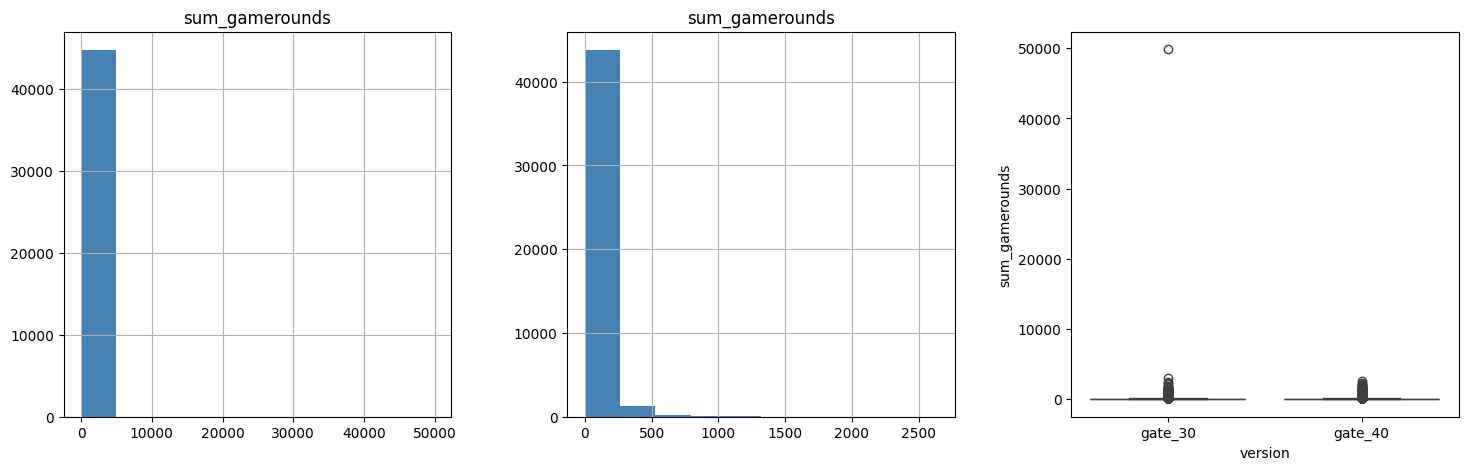

In [21]:
fig, axes = plt.subplots(1, 3, figsize = (18,5))
df[(df.version == "gate_30")].hist("sum_gamerounds", ax = axes[0], color = "steelblue")
df[(df.version == "gate_40")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
sns.boxplot(x = df.version, y = df.sum_gamerounds, ax = axes[2])

In [22]:
df.isnull().sum() 

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

Outliers

In [23]:
df.groupby("version")["sum_gamerounds"].agg(["mean","median","min","max","std"])

,mean,median,min,max,std
version,,,,,
gate_30,52.4563,17.0000,0,49854,256.7164
gate_40,51.2988,16.0000,0,2640,103.2944


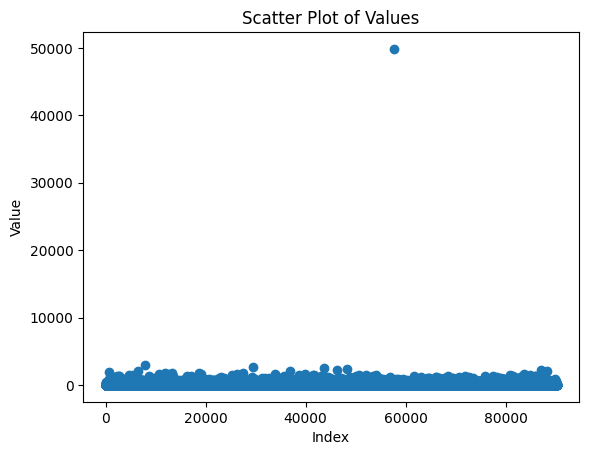

In [24]:
plt.scatter(df.index, df['sum_gamerounds'])
plt.title('Scatter Plot of Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

<Axes: xlabel='version', ylabel='sum_gamerounds'>

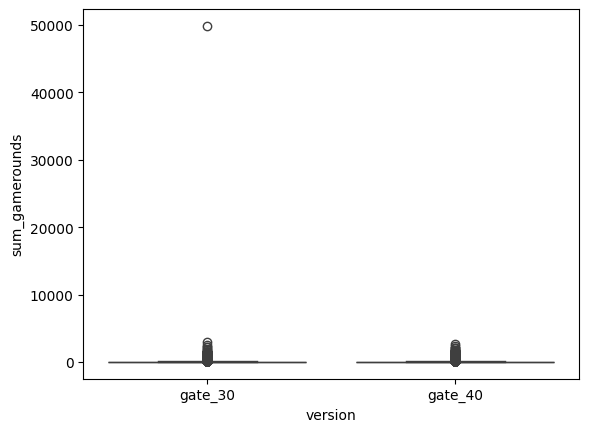

In [25]:
fig, axes = plt.subplots(1, 1)
sns.boxplot(x = df.version, y = df.sum_gamerounds)

In [26]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [27]:
outlier_thresholds(df, "sum_gamerounds")

(np.float64(-739.5), np.float64(1232.5))

In [28]:
replace_with_thresholds(df, "sum_gamerounds")

In [29]:
df.groupby("version")["sum_gamerounds"].agg(["mean","median","min","max","std"])

,mean,median,min,max,std
version,,,,,
gate_30,51.1534,17.0000,0.0000,1232.5000,98.8021
gate_40,51.0658,16.0000,0.0000,1232.5000,99.8121


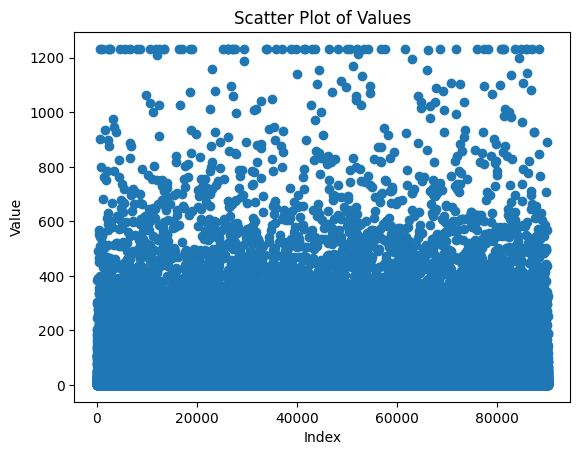

In [30]:
plt.scatter(df.index, df['sum_gamerounds'])
plt.title('Scatter Plot of Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

<Axes: xlabel='version', ylabel='sum_gamerounds'>

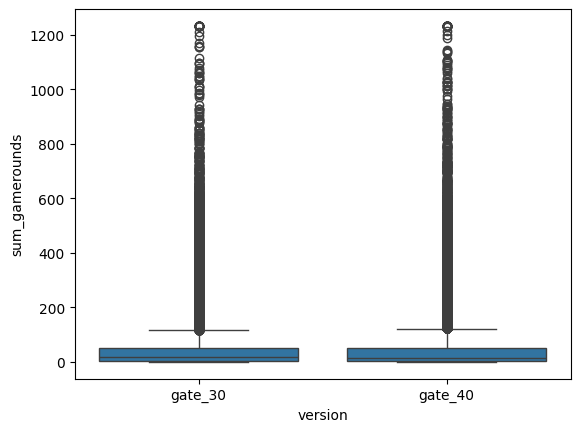

In [31]:
fig, axes = plt.subplots(1, 1)
sns.boxplot(x = df.version, y = df.sum_gamerounds)

AB Testing
Formulate Hypotheses
Assumption Check
Normality Assumption
Homogeneity of Variance
Implementation of the Hypothesis
If assumptions are met, use the independent two-sample t-test (parametric test)
If assumptions are not met, use the Mann-Whitney U test (non-parametric test)
Interpret results based on p-value

In [32]:
df["version"] = np.where(df.version == "gate_30", "A", "B")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3.0000,False,False
1,337,A,38.0000,True,False
2,377,B,165.0000,True,False
3,483,B,1.0000,False,False
4,488,B,179.0000,True,True


In [33]:
df[df["version"] == "A"]["sum_gamerounds"]

0        3.0000
1       38.0000
6        0.0000
11       0.0000
13      39.0000
          ...  
90179   14.0000
90180    7.0000
90182   21.0000
90183   10.0000
90186   28.0000
Name: sum_gamerounds, Length: 44700, dtype: float64

Assumption Check
Normality Assumption Check

In [34]:
test_stat, pvalue = shapiro(df[df["version"] == "A"]["sum_gamerounds"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.5104, p-value = 0.0000


In [15]:
from scipy.stats import shapiro

In [12]:
import numpy as np
from scipy.stats import shapiro

# Example data
data = np.random.normal(loc=0, scale=1, size=100)

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(data)

print(f'Statistic: %.4f, p-value: %.4f')


Statistic: %.4f, p-value: %.4f
